In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sold = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-project/coffee/Cafe - Sell Meta Data.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-project/coffee/Cafe - Transaction - Store.csv')
date_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-project/coffee/DateInfo.csv')

In [ ]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


<Axes: ylabel='ITEM_NAME'>

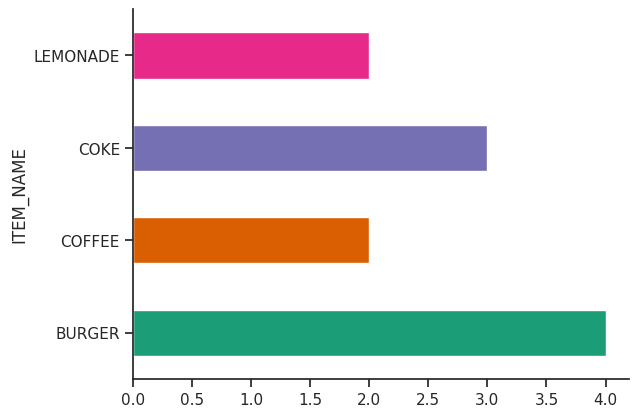

In [ ]:
# @title ITEM_NAME

from matplotlib import pyplot as plt
import seaborn as sns
sold.groupby('ITEM_NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sold.describe(include = ['O'])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [ ]:
sold.isnull().sum()

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64

In [ ]:
sold.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


In [ ]:
transactions.head()

,STORE,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,1,1/1/12,15.50,46,1070,0
1,1,1/1/12,12.73,22,2051,2
2,1,1/1/12,12.75,18,2052,2
3,1,1/1/12,12.60,30,2053,2
4,1,1/2/12,15.50,70,1070,0


In [ ]:
transactions.isnull().sum()

STORE            0
CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

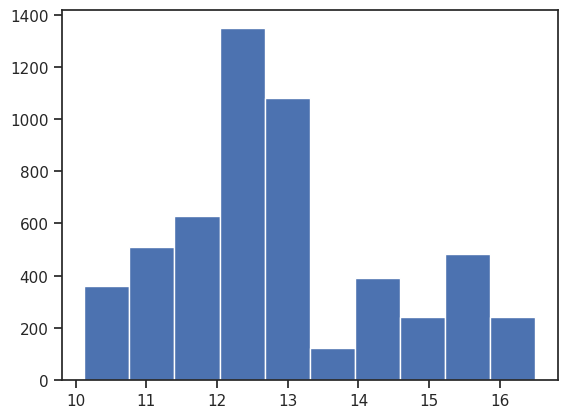

In [ ]:
plt.hist(transactions.PRICE)

In [ ]:
transactions.isnull().sum()

STORE            0
CALENDAR_DATE    0
PRICE            0
QUANTITY         0
SELL_ID          0
SELL_CATEGORY    0
dtype: int64

In [ ]:
transactions.describe()

,STORE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.0,5404.000000,5404.000000,5404.00000,5404.000000
mean,1.0,12.868729,44.335307,1806.50000,1.500000
std,0.0,1.563922,25.502597,425.25841,0.866106
min,1.0,10.120000,8.000000,1070.00000,0.000000
25%,1.0,11.530000,24.000000,1805.75000,1.500000
50%,1.0,12.640000,36.000000,2051.50000,2.000000
75%,1.0,13.557500,60.000000,2052.25000,2.000000
max,1.0,16.500000,124.000000,2053.00000,2.000000


In [ ]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [ ]:
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [ ]:
date_info.isnull().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

In [ ]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [ ]:
date_info.isnull().sum()

CALENDAR_DATE          0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

In [ ]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,True,False,False,False
1,3055,False,True,False,False
2,3067,False,False,True,False
3,3028,False,False,False,True
4,2051,True,False,False,False
5,2051,False,False,True,False
6,2052,True,False,False,False
7,2052,False,False,False,True
8,2053,True,False,False,False
9,2053,False,False,True,False


In [ ]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [ ]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,STORE,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,1,1/1/12,15.5,46
1,1070,0,BURGER,1,1/2/12,15.5,70
2,1070,0,BURGER,1,1/3/12,15.5,62
3,1070,0,BURGER,1,1/4/12,15.5,88
4,1070,0,BURGER,1,1/5/12,15.5,104
5,1070,0,BURGER,1,1/6/12,15.5,100
6,1070,0,BURGER,1,1/7/12,15.5,70
7,1070,0,BURGER,1,1/8/12,15.5,70
8,1070,0,BURGER,1,1/9/12,15.5,106
9,1070,0,BURGER,1,1/10/12,15.5,108


In [ ]:
data1.shape
intermediate_data = b.reset_index()

(10808, 7)

In [ ]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,1/1/12,15.5,46
1,1070,0,BURGER,1/1/13,15.5,60
2,1070,0,BURGER,1/1/14,15.5,72
3,1070,0,BURGER,1/1/15,14.0,66
4,1070,0,BURGER,1/10/12,15.5,108


In [ ]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.50,46,2012,New Year,1,0,24.8,0
1,2051,2,BURGER,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
2,2051,2,COKE,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
3,2052,2,BURGER,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
4,2052,2,LEMONADE,1/1/12,12.75,18,2012,New Year,1,0,24.8,0


In [ ]:
combined_data.isnull().sum()

SELL_ID                0
SELL_CATEGORY          0
ITEM_NAME              0
CALENDAR_DATE          0
PRICE                  0
QUANTITY               0
YEAR                   0
HOLIDAY                0
IS_WEEKEND             0
IS_SCHOOLBREAK         0
AVERAGE_TEMPERATURE    0
IS_OUTDOOR             0
dtype: int64

In [ ]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
32,1070,0,BURGER,1/10/12,15.50,108,2012,No Holiday,0,0,24.8,0
33,2051,2,BURGER,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0
34,2051,2,COKE,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0
35,2052,2,BURGER,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0
36,2052,2,LEMONADE,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0


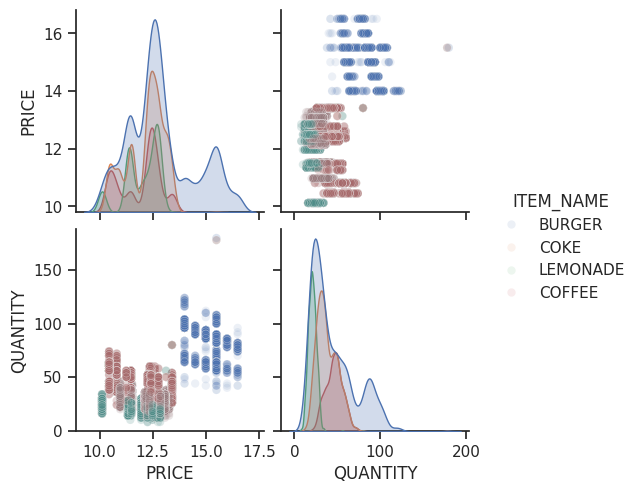

In [ ]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.50,46,2012,New Year,1,0,24.8,0
1,2051,2,BURGER,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
3,2052,2,BURGER,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
5,2053,2,BURGER,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
8,1070,0,BURGER,1/1/13,15.50,60,2013,New Year,0,0,30.2,1


(5404, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,5404.00000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,1806.50000,1.500000,12.868729,44.465581,2013.374537,0.284974,0.204293,56.295337,0.862324
std,425.25841,0.866106,1.563922,25.741078,1.072077,0.451444,0.403221,20.223179,0.344591
min,1070.00000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.75000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.50000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2052.25000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.00000,2.000000,16.500000,180.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

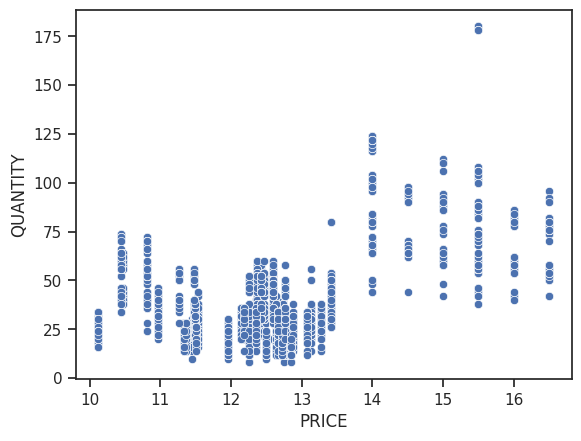

In [ ]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
14,2053,2,COFFEE,1/1/13,13.41,30,2013,New Year,0,0,30.2,1
22,2053,2,COFFEE,1/1/14,12.37,44,2014,New Year,0,0,19.4,0
30,2053,2,COFFEE,1/1/15,10.81,36,2015,New Year,0,0,37.4,1
38,2053,2,COFFEE,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0


(1351, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1351.0,1351.0,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,2053.0,2.0,11.941377,46.205774,2013.374537,0.284974,0.204293,56.295337,0.862324
std,0.0,0.0,0.946494,10.075081,1.072375,0.451569,0.403333,20.228796,0.344687
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,38.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,46.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2053.0,2.0,12.600000,52.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,80.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

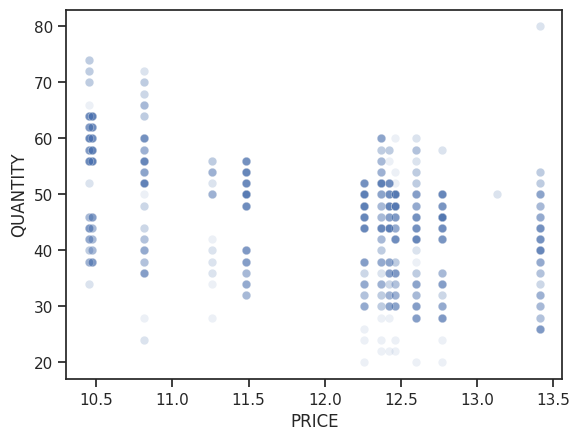

In [ ]:
coffee = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY , alpha = 0.1)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
12,2052,2,LEMONADE,1/1/13,12.64,16,2013,New Year,0,0,30.2,1
20,2052,2,LEMONADE,1/1/14,11.96,20,2014,New Year,0,0,19.4,0
28,2052,2,LEMONADE,1/1/15,11.45,20,2015,New Year,0,0,37.4,1
36,2052,2,LEMONADE,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0


(1351, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1351.0,1351.0,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,2052.0,2.0,11.986751,20.792006,2013.374537,0.284974,0.204293,56.295337,0.862324
std,0.0,0.0,0.806112,5.215685,1.072375,0.451569,0.403333,20.228796,0.344687
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,13.410000,80.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

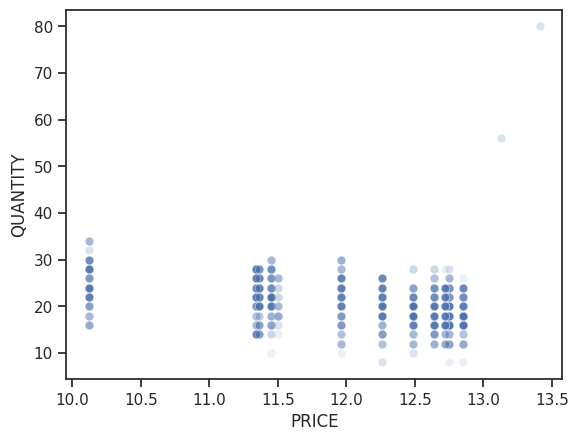

In [ ]:
lemonade = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
lemonade.head()
lemonade.shape
lemonade.describe()
sns.scatterplot(x = lemonade.PRICE, y = lemonade.QUANTITY , alpha = 0.1)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
7,2053,2,COKE,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
10,2051,2,COKE,1/1/13,13.13,22,2013,New Year,0,0,30.2,1
15,2053,2,COKE,1/1/13,13.41,30,2013,New Year,0,0,30.2,1
18,2051,2,COKE,1/1/14,13.27,22,2014,New Year,0,0,19.4,0


(2702, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,2702.000000,2702.0,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000
mean,2052.000000,2.0,12.162372,37.754996,2013.374537,0.284974,0.204293,56.295337,0.862324
std,1.000185,0.0,0.873843,12.481661,1.072177,0.451486,0.403259,20.225051,0.344623
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,28.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2053.000000,2.0,12.770000,46.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,15.500000,178.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

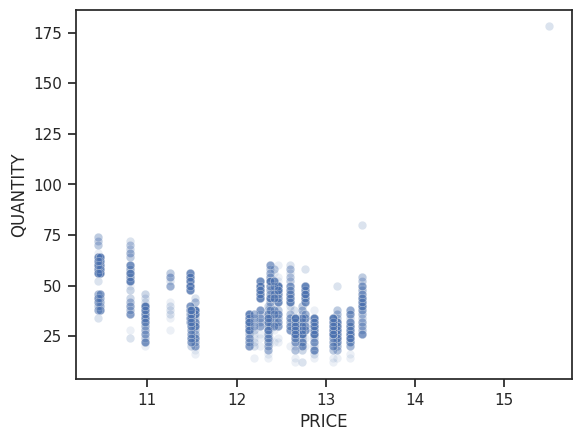

In [ ]:
coke= combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

In [ ]:
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.50,46,2012,New Year,1,0,24.8,0
1,2051,2,BURGER,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
2,2051,2,COKE,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
3,2052,2,BURGER,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
4,2052,2,LEMONADE,1/1/12,12.75,18,2012,New Year,1,0,24.8,0


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='YEAR', ylabel='PRICE'>

Text(0.5, 1.0, 'Average Item Price Variation Over the Years')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Price')

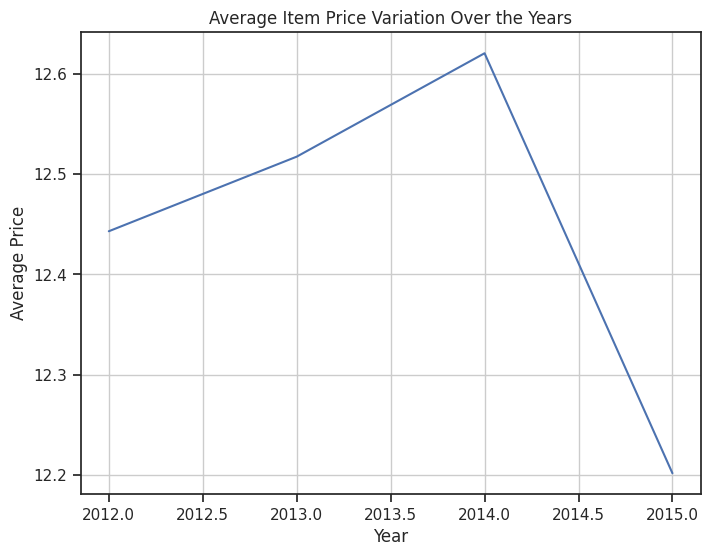

In [ ]:
average_price_per_year = combined_data.groupby( 'YEAR')['PRICE'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='YEAR', y='PRICE', data=average_price_per_year)
plt.title('Average Item Price Variation Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='QUANTITY', ylabel='ITEM_NAME'>

Text(0.5, 1.0, 'Sales Quantities Across Different Items')

Text(0.5, 0, 'Total Quantity Sold')

Text(0, 0.5, 'Item')

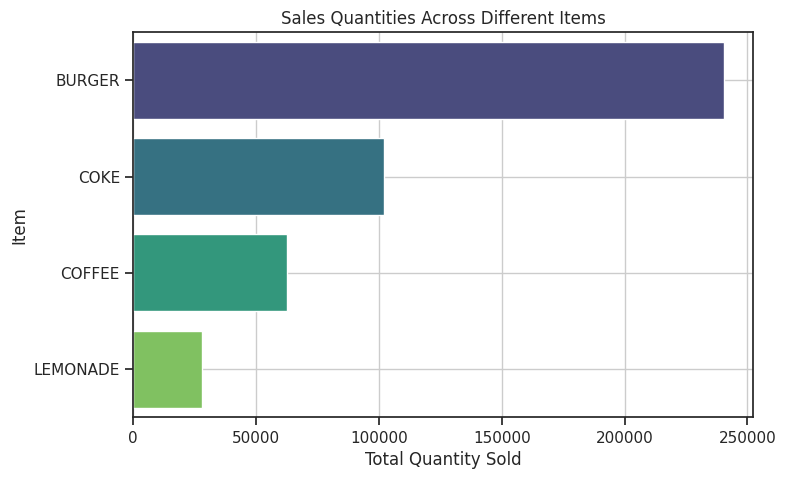

In [ ]:
sales_quantities_by_item = combined_data.groupby('ITEM_NAME')['QUANTITY'].sum().sort_values (ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='QUANTITY', y='ITEM_NAME', data=sales_quantities_by_item, palette='viridis')
plt.title('Sales Quantities Across Different Items')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item')
plt.grid(True)
plt.show()

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10808 entries, 0 to 10807
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SELL_ID              10808 non-null  int64  
 1   SELL_CATEGORY        10808 non-null  int64  
 2   ITEM_NAME            10808 non-null  object 
 3   CALENDAR_DATE        10808 non-null  object 
 4   PRICE                10808 non-null  float64
 5   QUANTITY             10808 non-null  int64  
 6   YEAR                 10808 non-null  int64  
 7   HOLIDAY              10808 non-null  object 
 8   IS_WEEKEND           10808 non-null  int64  
 9   IS_SCHOOLBREAK       10808 non-null  int64  
 10  AVERAGE_TEMPERATURE  10808 non-null  float64
 11  IS_OUTDOOR           10808 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1013.4+ KB


In [ ]:
min_values = combined_data['CALENDAR_DATE'].min()
max_values = combined_data['CALENDAR_DATE'].max()

# Display the minimum and maximum values
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
1/1/12

Maximum values:
9/9/15


For product - burger

In [ ]:
burger.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/1/12,15.50,46,2012,New Year,1,0,24.8,0
1,2051,2,BURGER,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
3,2052,2,BURGER,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
5,2053,2,BURGER,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
8,1070,0,BURGER,1/1/13,15.50,60,2013,New Year,0,0,30.2,1


In [ ]:
burger.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5404 entries, 0 to 10805
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SELL_ID              5404 non-null   int64  
 1   SELL_CATEGORY        5404 non-null   int64  
 2   ITEM_NAME            5404 non-null   object 
 3   CALENDAR_DATE        5404 non-null   object 
 4   PRICE                5404 non-null   float64
 5   QUANTITY             5404 non-null   int64  
 6   YEAR                 5404 non-null   int64  
 7   HOLIDAY              5404 non-null   object 
 8   IS_WEEKEND           5404 non-null   int64  
 9   IS_SCHOOLBREAK       5404 non-null   int64  
 10  AVERAGE_TEMPERATURE  5404 non-null   float64
 11  IS_OUTDOOR           5404 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 677.9+ KB


In [ ]:
num_lags = 15

for lag in range(1, num_lags + 1):
    burger[f'PRICE_LAG_{lag}'] = burger['PRICE'].shift(lag)

In [ ]:
burger.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE_LAG_1,PRICE_LAG_2,PRICE_LAG_3,PRICE_LAG_4,PRICE_LAG_5,PRICE_LAG_6,PRICE_LAG_7,PRICE_LAG_8,PRICE_LAG_9,PRICE_LAG_10,PRICE_LAG_11,PRICE_LAG_12,PRICE_LAG_13,PRICE_LAG_14,PRICE_LAG_15
0,1070,0,BURGER,1/1/12,15.50,46,2012,New Year,1,0,24.8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2051,2,BURGER,1/1/12,12.73,22,2012,New Year,1,0,24.8,0,15.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2052,2,BURGER,1/1/12,12.75,18,2012,New Year,1,0,24.8,0,12.73,15.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2053,2,BURGER,1/1/12,12.60,30,2012,New Year,1,0,24.8,0,12.75,12.73,15.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1070,0,BURGER,1/1/13,15.50,60,2013,New Year,0,0,30.2,1,12.60,12.75,12.73,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
burger.dropna(subset=[f'PRICE_LAG_{lag}' for lag in range(1, num_lags + 1)], inplace=True)

In [ ]:
burger.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,PRICE_LAG_1,PRICE_LAG_2,PRICE_LAG_3,PRICE_LAG_4,PRICE_LAG_5,PRICE_LAG_6,PRICE_LAG_7,PRICE_LAG_8,PRICE_LAG_9,PRICE_LAG_10,PRICE_LAG_11,PRICE_LAG_12,PRICE_LAG_13,PRICE_LAG_14,PRICE_LAG_15
29,2053,2,BURGER,1/1/15,10.81,36,2015,New Year,0,0,37.4,1,11.45,11.53,14.00,12.37,11.96,13.27,15.50,13.41,12.64,13.13,15.50,12.60,12.75,12.73,15.50
32,1070,0,BURGER,1/10/12,15.50,108,2012,No Holiday,0,0,24.8,0,10.81,11.45,11.53,14.00,12.37,11.96,13.27,15.50,13.41,12.64,13.13,15.50,12.60,12.75,12.73
33,2051,2,BURGER,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0,15.50,10.81,11.45,11.53,14.00,12.37,11.96,13.27,15.50,13.41,12.64,13.13,15.50,12.60,12.75
35,2052,2,BURGER,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0,12.73,15.50,10.81,11.45,11.53,14.00,12.37,11.96,13.27,15.50,13.41,12.64,13.13,15.50,12.60
37,2053,2,BURGER,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0,12.75,12.73,15.50,10.81,11.45,11.53,14.00,12.37,11.96,13.27,15.50,13.41,12.64,13.13,15.50


In [ ]:
burger.columns

Index(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE',
       'QUANTITY', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR', 'PRICE_LAG_1', 'PRICE_LAG_2',
       'PRICE_LAG_3', 'PRICE_LAG_4', 'PRICE_LAG_5', 'PRICE_LAG_6',
       'PRICE_LAG_7', 'PRICE_LAG_8', 'PRICE_LAG_9', 'PRICE_LAG_10',
       'PRICE_LAG_11', 'PRICE_LAG_12', 'PRICE_LAG_13', 'PRICE_LAG_14',
       'PRICE_LAG_15'],
      dtype='object')

In [ ]:
features = [f'PRICE_LAG_{lag}' for lag in range(1, 16)]
target = 'PRICE'

In [ ]:
train_df, test_df = train_test_split(burger, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[features])
X_test = scaler.transform(test_df[features])

In [ ]:
X_train = train_df[features]
y_train = train_df['PRICE']

In [ ]:
X_test = test_df[features]
y_test = test_df['PRICE']

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} RMSE: {rmse}")

LinearRegression()

Linear Regression RMSE: 0.7224125044573938


RandomForestRegressor(random_state=42)

Random Forest Regression RMSE: 0.3741363788761317


In [ ]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, train_df[target])

RandomForestRegressor()

In [ ]:
test_df['PREDICTED_PRICE'] = forest_model.predict(X_test)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Prices for Burgers (Last 15 Days)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

([0, 1, 2, 3],
 [Text(0, 0, '9/9/12'),
  Text(1, 0, '9/9/13'),
  Text(2, 0, '9/9/14'),
  Text(3, 0, '9/9/15')])

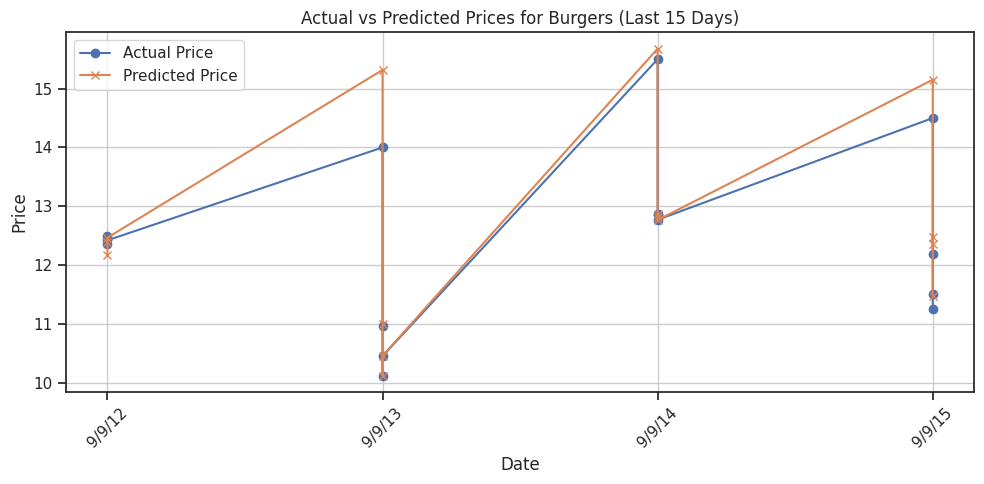

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_df['CALENDAR_DATE'].tail(15), test_df['PRICE'].tail(15), label='Actual Price', marker='o')
plt.plot(test_df['CALENDAR_DATE'].tail(15), test_df['PREDICTED_PRICE'].tail(15), label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Prices for Burgers (Last 15 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For Lemonade

In [ ]:
lemonade.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
12,2052,2,LEMONADE,1/1/13,12.64,16,2013,New Year,0,0,30.2,1
20,2052,2,LEMONADE,1/1/14,11.96,20,2014,New Year,0,0,19.4,0
28,2052,2,LEMONADE,1/1/15,11.45,20,2015,New Year,0,0,37.4,1
36,2052,2,LEMONADE,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0


In [ ]:
def create_lag_features(group):
    for lag in range(1, 16):
        group[f'PRICE_LAG_{lag}'] = group['PRICE'].shift(lag)
    return group

In [ ]:
lemonade_df_grouped = lemonade.groupby('ITEM_NAME').apply(create_lag_features)

In [ ]:
lemonade_df_grouped = lemonade_df_grouped.dropna(subset=[f'PRICE_LAG_{lag}' for lag in range(1, 16)])

In [ ]:
features = [f'PRICE_LAG_{lag}' for lag in range(1, 16)]
target = 'PRICE'

In [ ]:
lemonade_df_grouped.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  \
ITEM_NAME                                                              
LEMONADE  124     2052              2  LEMONADE       1/12/15  11.45   
          132     2052              2  LEMONADE       1/13/12  12.75   
          140     2052              2  LEMONADE       1/13/13  12.64   
          148     2052              2  LEMONADE       1/13/14  11.96   
          156     2052              2  LEMONADE       1/13/15  11.45   

               QUANTITY  YEAR     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
ITEM_NAME                                                               
LEMONADE  124        28  2015  No Holiday           0               0   
          132        26  2012  No Holiday           0               0   
          140        18  2013  No Holiday           1               0   
          148        24  2014  No Holiday           0               0   
          156        28  2015  No Holiday           0               0   

               AVERAGE_TEMPERATURE  IS_OUTDOOR  PRICE_LAG_1  PRICE_LAG_2  \
ITEM_NAME                                                                  
LEMONADE  124                 26.6           0        11.96        12.64   
          132                 26.6           0        11.45        11.96   
          140                 30.2           0        12.75        11.45   
          148                 28.4           0        12.64        12.75   
          156                 28.4           0        11.96        12.64   

               PRICE_LAG_3  PRICE_LAG_4  PRICE_LAG_5  PRICE_LAG_6  \
ITEM_NAME                                                           
LEMONADE  124        12.75        11.45        11.96        12.64   
          132        12.64        12.75        11.45        11.96   
          140        11.96        12.64        12.75        11.45   
          148        11.45        11.96        12.64        12.75   
          156        12.75        11.45        11.96        12.64   

               PRICE_LAG_7  PRICE_LAG_8  PRICE_LAG_9  PRICE_LAG_10  \
ITEM_NAME                                                            
LEMONADE  124        12.75        11.45        11.96         12.64   
          132        12.64        12.75        11.45         11.96   
          140        11.96        12.64        12.75         11.45   
          148        11.45        11.96        12.64         12.75   
          156        12.75        11.45        11.96         12.64   

               PRICE_LAG_11  PRICE_LAG_12  PRICE_LAG_13  PRICE_LAG_14  \
ITEM_NAME                                                               
LEMONADE  124         12.75         11.45         11.96         12.64   
          132         12.64         12.75         11.45         11.96   
          140         11.96         12.64         12.75         11.45   
          148         11.45         11.96         12.64         12.75   
          156         12.75         11.45         11.96         12.64   

               PRICE_LAG_15  
ITEM_NAME                    
LEMONADE  124         12.75  
          132         12.64  
          140         11.96  
          148         11.45  
          156         12.75

In [ ]:
train_df, test_df = train_test_split(lemonade_df_grouped, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
X_test_scaled = scaler.transform(test_df[features])

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, train_df[target])

LinearRegression()

In [ ]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train_scaled, train_df[target])

RandomForestRegressor()

In [ ]:
test_df['PREDICTED_PRICE_LINEAR'] = linear_model.predict(X_test_scaled)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Prices for Lemonade  - Linear Regression')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '9/6/13'),
  Text(1, 0, '9/6/14'),
  Text(2, 0, '9/6/15'),
  Text(3, 0, '9/7/12'),
  Text(4, 0, '9/7/13'),
  Text(5, 0, '9/7/14'),
  Text(6, 0, '9/7/15'),
  Text(7, 0, '9/8/12'),
  Text(8, 0, '9/8/13'),
  Text(9, 0, '9/8/14'),
  Text(10, 0, '9/8/15'),
  Text(11, 0, '9/9/12'),
  Text(12, 0, '9/9/13'),
  Text(13, 0, '9/9/14'),
  Text(14, 0, '9/9/15')])

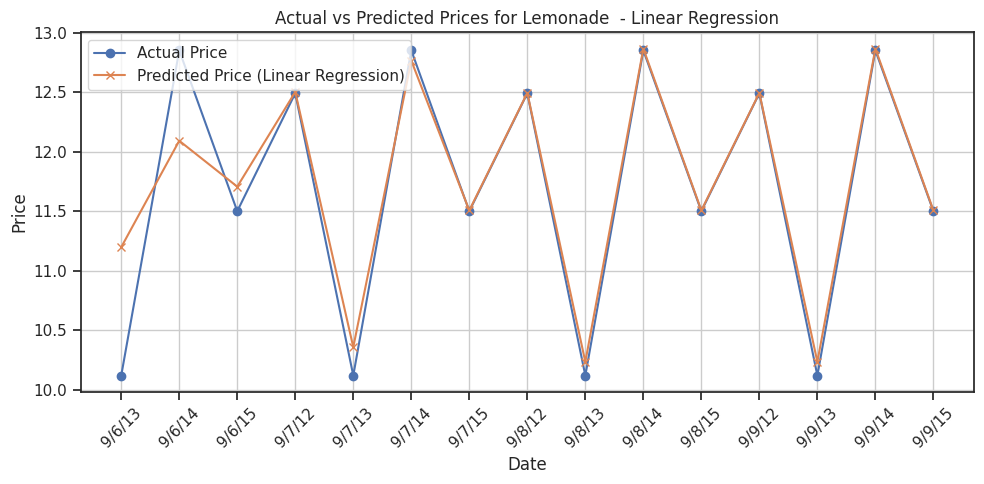

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_df['CALENDAR_DATE'].tail(15), test_df['PRICE'].tail(15), label='Actual Price', marker='o')
plt.plot(test_df['CALENDAR_DATE'].tail(15), test_df['PREDICTED_PRICE_LINEAR'].tail(15), label='Predicted Price (Linear Regression)', marker='x')
plt.title('Actual vs Predicted Prices for Lemonade  - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Podobar e Linear Regressor**

In [ ]:
coffee.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
14,2053,2,COFFEE,1/1/13,13.41,30,2013,New Year,0,0,30.2,1
22,2053,2,COFFEE,1/1/14,12.37,44,2014,New Year,0,0,19.4,0
30,2053,2,COFFEE,1/1/15,10.81,36,2015,New Year,0,0,37.4,1
38,2053,2,COFFEE,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0


In [ ]:
def create_lag_features(group):
    for lag in range(1, 16):
        group[f'PRICE_LAG_{lag}'] = group['PRICE'].shift(lag)
    return group

In [ ]:
coffee_df_grouped = coffee.groupby('ITEM_NAME').apply(create_lag_features)

In [ ]:
coffee_df_grouped.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  \
ITEM_NAME                                                                       
COFFEE    6      2053              2    COFFEE        1/1/12  12.60        30   
          14     2053              2    COFFEE        1/1/13  13.41        30   
          22     2053              2    COFFEE        1/1/14  12.37        44   
          30     2053              2    COFFEE        1/1/15  10.81        36   
          38     2053              2    COFFEE       1/10/12  12.60        58   

              YEAR     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
ITEM_NAME                                                    
COFFEE    6   2012    New Year           1               0   
          14  2013    New Year           0               0   
          22  2014    New Year           0               0   
          30  2015    New Year           0               0   
          38  2012  No Holiday           0               0   

              AVERAGE_TEMPERATURE  IS_OUTDOOR  PRICE_LAG_1  PRICE_LAG_2  \
ITEM_NAME                                                                 
COFFEE    6                  24.8           0          NaN          NaN   
          14                 30.2           1        12.60          NaN   
          22                 19.4           0        13.41        12.60   
          30                 37.4           1        12.37        13.41   
          38                 24.8           0        10.81        12.37   

              PRICE_LAG_3  PRICE_LAG_4  PRICE_LAG_5  PRICE_LAG_6  PRICE_LAG_7  \
ITEM_NAME                                                                       
COFFEE    6           NaN          NaN          NaN          NaN          NaN   
          14          NaN          NaN          NaN          NaN          NaN   
          22          NaN          NaN          NaN          NaN          NaN   
          30        12.60          NaN          NaN          NaN          NaN   
          38        13.41         12.6          NaN          NaN          NaN   

              PRICE_LAG_8  PRICE_LAG_9  PRICE_LAG_10  PRICE_LAG_11  \
ITEM_NAME                                                            
COFFEE    6           NaN          NaN           NaN           NaN   
          14          NaN          NaN           NaN           NaN   
          22          NaN          NaN           NaN           NaN   
          30          NaN          NaN           NaN           NaN   
          38          NaN          NaN           NaN           NaN   

              PRICE_LAG_12  PRICE_LAG_13  PRICE_LAG_14  PRICE_LAG_15  
ITEM_NAME                                                             
COFFEE    6            NaN           NaN           NaN           NaN  
          14           NaN           NaN           NaN           NaN  
          22           NaN           NaN           NaN           NaN  
          30           NaN           NaN           NaN           NaN  
          38           NaN           NaN           NaN           NaN

In [ ]:
coffee_df_grouped = coffee_df_grouped.dropna(subset=[f'PRICE_LAG_{lag}' for lag in range(1, 16)])

In [ ]:
features2 = [f'PRICE_LAG_{lag}' for lag in range(1, 16)]
target2 = 'PRICE'

In [ ]:
train_df2, test_df2 = train_test_split(coffee_df_grouped, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df2[features2])
X_test_scaled = scaler.transform(test_df2[features2])

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, train_df2[target2])

LinearRegression()

In [ ]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train_scaled, train_df2[target2])


RandomForestRegressor()

In [ ]:
test_df2['PREDICTED_PRICE_LINEAR'] = linear_model.predict(X_test_scaled)


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Prices for Coffee  - Linear Regression')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '9/6/13'),
  Text(1, 0, '9/6/14'),
  Text(2, 0, '9/6/15'),
  Text(3, 0, '9/7/12'),
  Text(4, 0, '9/7/13'),
  Text(5, 0, '9/7/14'),
  Text(6, 0, '9/7/15'),
  Text(7, 0, '9/8/12'),
  Text(8, 0, '9/8/13'),
  Text(9, 0, '9/8/14'),
  Text(10, 0, '9/8/15'),
  Text(11, 0, '9/9/12'),
  Text(12, 0, '9/9/13'),
  Text(13, 0, '9/9/14'),
  Text(14, 0, '9/9/15')])

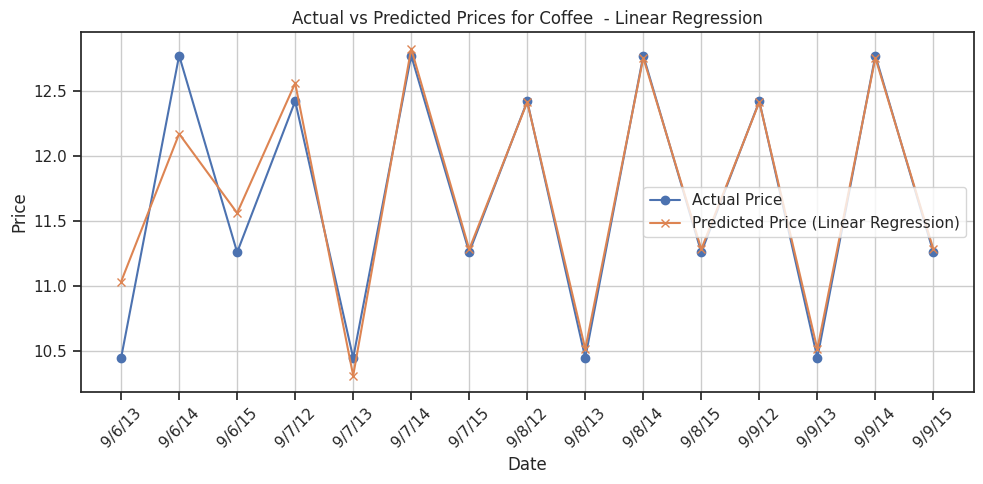

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_df2['CALENDAR_DATE'].tail(15), test_df2['PRICE'].tail(15), label='Actual Price', marker='o')
plt.plot(test_df2['CALENDAR_DATE'].tail(15), test_df2['PREDICTED_PRICE_LINEAR'].tail(15), label='Predicted Price (Linear Regression)', marker='x')
plt.title('Actual vs Predicted Prices for Coffee  - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()